In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn
import xgboost
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('expresso_processed.csv')
data.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


In [3]:
df = data.copy()
df.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


In [5]:
df.isnull().sum()

TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
MRG               0
REGULARITY        0
CHURN             0
dtype: int64

In [6]:
cat = df.select_dtypes(exclude = 'number')
num = df.select_dtypes(include = 'number')

print('Categorical Dataset')
display(cat.head())
print(f'\n\nNumerical Dataset')
display(num.head())

Categorical Dataset


,TENURE,MRG
0,K > 24 month,NO
1,K > 24 month,NO
2,K > 24 month,NO
3,I 18-21 month,NO
4,K > 24 month,NO




Numerical Dataset


,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,32,1
1,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,29,1
2,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,49,1
3,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,1,1
4,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,21,1


In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib
encoded = {}

for i in cat:
    encoder = LabelEncoder()
    df[i] = encoder.fit_transform(df[i])
    encoded[i + '_encoder'] = encoder
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))

encoded

{'TENURE_encoder': LabelEncoder(), 'MRG_encoder': LabelEncoder()}

In [8]:
#ascertain columns that needs scaling
columns_to_scale = []
for i in num:
    if df[i].describe()[2] > 1500:
        columns_to_scale.append(i)
        print(f'{i}: {df[i].describe()[2]}')

MONTANT: 6777.622015806804
REVENUE: 6913.023944087712
ARPU_SEGMENT: 2304.3384586278357
DATA_VOLUME: 7841.567789623757


In [10]:
#scale the numerical columns
from sklearn.preprocessing import StandardScaler
import joblib
scaled = {}

for i in columns_to_scale:
    scaler = StandardScaler()
    df[i] = scaler.fit_transform(df[[i]])
    joblib.dump(scaler, open(f'{i}_scaler.pkl', 'wb')) # ..................... Save the encoder into my file directory
    scaled[i + '_scaled'] = scaler

scaled

{'MONTANT_scaled': StandardScaler(),
 'REVENUE_scaled': StandardScaler(),
 'ARPU_SEGMENT_scaled': StandardScaler(),
 'DATA_VOLUME_scaled': StandardScaler()}

In [11]:
x = df.drop('CHURN', axis = 1)
y = df.CHURN

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.8, stratify = y, random_state = 5)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg_model = LogisticRegression()

log_reg_model.fit(xtrain, ytrain)

cross_validation = log_reg_model.predict(xtrain) 
print(classification_report(cross_validation, ytrain))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     27476
           1       0.76      0.74      0.75     24024

    accuracy                           0.77     51500
   macro avg       0.77      0.77      0.77     51500
weighted avg       0.77      0.77      0.77     51500



[Text(0, 0, '35000'), Text(0, 0, '29376')]

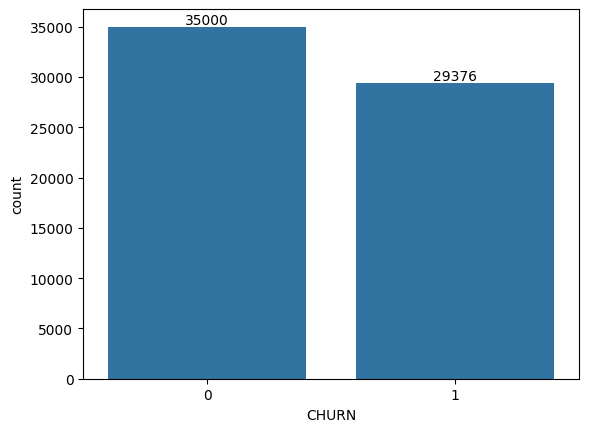

In [14]:
fig = sns.countplot(x = df['CHURN'])
fig.bar_label(fig.containers[0])

In [15]:
pred = log_reg_model.predict(xtest)
print(classification_report(pred, ytest))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78      6877
           1       0.75      0.73      0.74      5999

    accuracy                           0.76     12876
   macro avg       0.76      0.76      0.76     12876
weighted avg       0.76      0.76      0.76     12876



In [ ]:
joblib.dump(log_reg_model, open('ExpressoModel.pkl', 'wb'))